# Classification algorithms

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('pca.csv')

df.head()

,0,1,2,3,4,5,6,7,8,9,target
0,5.957317,-2.194385,-1.450285,-0.167148,-0.694979,-0.383369,1.456618,0.103518,0.583459,0.439535,0
1,7.939563,0.090557,0.441206,-0.930053,-0.375203,0.302911,-0.491021,0.222821,0.333514,0.159313,0
2,6.970815,-2.199521,-0.032964,-2.348542,0.884256,-0.283119,-0.102020,0.017021,0.585696,-0.301648,0
3,1.593908,4.791936,0.057138,-1.166422,-0.316182,0.360219,0.152939,-0.034419,0.303600,-0.048691,0
4,4.770630,-0.386930,-0.959552,0.357948,-0.467621,-0.502110,0.353892,-0.149115,-0.027879,0.261603,0


## Data split

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns = 'target')
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
y_train.value_counts()

1    226
0     87
Name: target, dtype: int64

## Dataset balancing

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [11]:
y_train.value_counts()

0    226
1    226
Name: target, dtype: int64

## GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

In [47]:
def GridParam(x,y, model, parameters, scoring):
    X_grid, Y_grid = x, y
    try:
        grid = GridSearchCV(model(random_state= 0), parameters, cv=10, scoring = scoring)
    except:
        grid = GridSearchCV(model(), parameters, cv=10, scoring = scoring)
    grid.fit(X_grid, Y_grid)
    
    print(f'The parameters combination that would give best {scoring} are: ')
    print(grid.best_params_)
    print(f'The best {scoring} achieved: {grid.best_score_}')

    return grid

## Random Forest + GridSearchCV

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc_param = {'max_features':[3,5,7],'max_depth':[3,5,7], 'min_samples_leaf': [2,3] }
grid = GridParam(X_train, y_train, RandomForestClassifier, rfc_param, 'recall')

The parameters combination that would give best recall are: 
{'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 2}
The best recall achieved: 0.9604743083003953


In [39]:
rfc_best = RandomForestClassifier(max_features = grid.best_params_["max_features"], max_depth = grid.best_params_["max_depth"],
                                  min_samples_leaf = grid.best_params_["min_samples_leaf"], random_state = 0)

In [40]:
rfc_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=2,
                       random_state=0)

### Metrics

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

Accuracy: 0.9481481481481482


Text(0.5, 15.0, 'Predicted label')

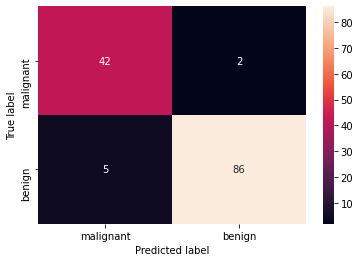

In [23]:
y_pred=rfc_best.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

cf_Matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['malignant', 'benign'], yticklabels = ['malignant' ,'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Support Vector Machines (SVM)

In [24]:
from sklearn.svm import SVC

In [41]:
svc_param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridParam(X_train, y_train, SVC, svc_param, 'recall')

The parameters combination that would give best recall are: 
{'kernel': 'poly'}
The best recall achieved: 0.9954545454545455


In [42]:
svm_best = SVC(kernel = grid.best_params_["kernel"], random_state = 0)

In [43]:
svm_best.fit(X_train,y_train)

SVC(kernel='poly', random_state=0)

### Metrics

Accuracy: 0.9259259259259259


Text(0.5, 15.0, 'Predicted label')

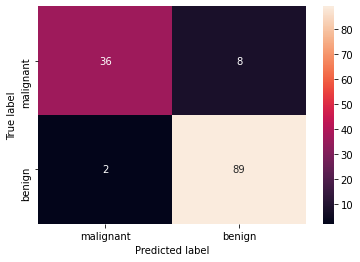

In [30]:
y_pred=svm_best.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

cf_Matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['malignant', 'benign'], yticklabels = ['malignant' ,'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

## K-Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn_param = {'n_neighbors':[2,5,7,10], 'metric':['minkowski','manhattan','cosine']}
grid = GridParam(X_train, y_train, KNeighborsClassifier, knn_param, 'recall')

The parameters combination that would give best recall are: 
{'metric': 'minkowski', 'n_neighbors': 5}
The best recall achieved: 0.9648221343873518


In [51]:
knn_best = KNeighborsClassifier(n_neighbors = grid.best_params_["n_neighbors"], metric = grid.best_params_["metric"])

In [52]:
knn_best.fit(X_train,y_train)

KNeighborsClassifier()

### Metrics

Accuracy: 0.9481481481481482


Text(0.5, 15.0, 'Predicted label')

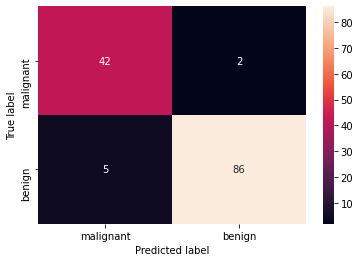

In [54]:
y_pred=knn_best.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

cf_Matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['malignant', 'benign'], yticklabels = ['malignant' ,'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Artificial Neural Networks

In [97]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import Recall

In [79]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = len(X_train.columns)))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [98]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy',Recall(name = 'recall')])

In [99]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
15/15 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - recall: 1.0000
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9978 - recall: 1.0000
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - recall: 1.0000
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - recall: 1.0000
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 4.8552e-04 - accuracy: 1.0000 - recall: 1.0000
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 4.2872e-04 - accuracy: 1.0000 - recall: 1.0000
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 3.4233e-04 - accuracy: 1.0000 - recall: 1.0000
Epoch 8/20
15/15 [==============================] - 0s 2ms/step - loss: 2.8908e-04 - accuracy: 1.0000 - recall: 1.0000
Epoch 9/20
15/15 [==============================] - 0s 2ms/step 

### Metrics

Accuracy: 0.9851851851851852


Text(0.5, 15.0, 'Predicted label')

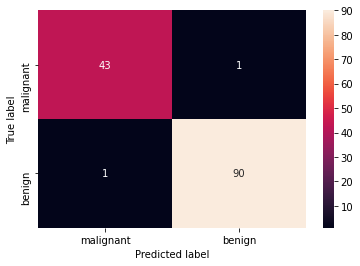

In [100]:
y_pred=model.predict(X_test)
y_pred = y_pred.reshape(-1)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

print("Accuracy:",accuracy_score(y_test, y_pred))

cf_Matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['malignant', 'benign'], yticklabels = ['malignant' ,'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')